In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('dados_projeto.csv')

In [33]:
data

,Hora de saida,Cliente,Artesão,Preço,Produto,Hora de chegada,Cartão,Espécie,Quantidade
0,2019-07-02 14:19:17,Sônia Fernanda Carvalho Neto,Srta. Ornela Marisa Padrão,272953,deserunt,2016-11-13 22:44:39,NaN,1.0,55573
1,1991-05-01 00:02:32,Srta. Samara Adriele Neves,Dr. Mateus Vega Sobrinho,60,consectetur,2001-04-19 05:02:36,1.0,1.0,7469
2,1992-04-24 00:11:29,Dr. Teobaldo Santacruz Filho,Wilson Corona,48,cumque,1987-06-01 23:20:08,1.0,1.0,381596740
3,1987-12-14 11:28:15,Sra. Andressa Lozano Neto,Srta. Gabrielle Rocha Azevedo Jr.,682,sit,2019-06-21 12:22:52,1.0,1.0,46528148
4,2017-07-09 06:37:54,Rodolfo Vicente Gomes,Sr. Hernani Fabrício Serra Sobrinho,8646,consequatur,1975-01-28 14:37:58,NaN,NaN,72777
...,...,...,...,...,...,...,...,...,...
995,1995-01-05 22:48:44,Srta. Karine Delvalle,Dr. Augusto Carvalho de Freitas,587781,sunt,2015-10-12 16:21:34,NaN,1.0,91
996,1987-04-26 02:21:55,Gabriela Márcia Urias,Marcos Serra,29,optio,2013-11-21 16:56:38,1.0,NaN,11344007
997,1987-05-01 19:52:56,Dr. Raysa Azevedo Filho,Sr. Rodrigo Branco Meireles Jr.,89846,deleniti,2004-06-28 20:32:49,1.0,1.0,732361
998,2021-09-13 03:42:15,Yasmin Domingues Jr.,William Martines Gomes,4670,ullam,1991-09-01 09:02:29,1.0,1.0,0


In [34]:
# Limpando o dataframe

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'

data['Hora de saida'] = data['Hora de saida'].str[4:]
data['Hora de saida'] = '2021' + data['Hora de saida']

data['Hora de chegada'] = data['Hora de chegada'].str[4:]
data['Hora de chegada'] = '2021' + data['Hora de chegada']

data['Preço'] = data['Preço'] % 1000

data['Quantidade'] = data['Quantidade'] % 10
for i in range(0, 1000):
    if data['Quantidade'][i] == 0:
        data['Quantidade'][i] = 1

In [36]:
data.head()

,Hora de saida,Cliente,Artesão,Preço,Produto,Hora de chegada,Cartão,Espécie,Quantidade
0,2021-07-02 14:19:17,Sônia Fernanda Carvalho Neto,Srta. Ornela Marisa Padrão,953,deserunt,2021-11-13 22:44:39,NaN,1.0,3
1,2021-05-01 00:02:32,Srta. Samara Adriele Neves,Dr. Mateus Vega Sobrinho,60,consectetur,2021-04-19 05:02:36,1.0,1.0,9
2,2021-04-24 00:11:29,Dr. Teobaldo Santacruz Filho,Wilson Corona,48,cumque,2021-06-01 23:20:08,1.0,1.0,1
3,2021-12-14 11:28:15,Sra. Andressa Lozano Neto,Srta. Gabrielle Rocha Azevedo Jr.,682,sit,2021-06-21 12:22:52,1.0,1.0,8
4,2021-07-09 06:37:54,Rodolfo Vicente Gomes,Sr. Hernani Fabrício Serra Sobrinho,646,consequatur,2021-01-28 14:37:58,NaN,NaN,7


In [37]:
# Tirando colunas que não são válidas para a análise e/ou comprometem de alguma forma a integridade dos envolvidos

In [38]:
data.drop('Cliente', inplace=True, axis=1)
data.drop('Artesão', inplace=True, axis=1)
data.head()

,Hora de saida,Preço,Produto,Hora de chegada,Cartão,Espécie,Quantidade
0,2021-07-02 14:19:17,953,deserunt,2021-11-13 22:44:39,NaN,1.0,3
1,2021-05-01 00:02:32,60,consectetur,2021-04-19 05:02:36,1.0,1.0,9
2,2021-04-24 00:11:29,48,cumque,2021-06-01 23:20:08,1.0,1.0,1
3,2021-12-14 11:28:15,682,sit,2021-06-21 12:22:52,1.0,1.0,8
4,2021-07-09 06:37:54,646,consequatur,2021-01-28 14:37:58,NaN,NaN,7


In [39]:
# Analíse mais básica do dataframe para poder melhor visualizar nossas opções

In [40]:
data.shape

(1000, 7)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hora de saida    1000 non-null   object 
 1   Preço            1000 non-null   int64  
 2   Produto          1000 non-null   object 
 3   Hora de chegada  1000 non-null   object 
 4   Cartão           517 non-null    float64
 5   Espécie          505 non-null    float64
 6   Quantidade       1000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [42]:
data.describe()

,Preço,Cartão,Espécie,Quantidade
count,1000.000000,517.0,505.0,1000.000000
mean,375.793000,1.0,1.0,4.643000
std,321.544437,0.0,0.0,2.709777
min,0.000000,1.0,1.0,1.000000
25%,60.750000,1.0,1.0,2.000000
50%,324.500000,1.0,1.0,4.000000
75%,661.250000,1.0,1.0,7.000000
max,999.000000,1.0,1.0,9.000000


In [43]:
data.sort_values(by=['Preço', 'Quantidade'], ascending=[False, False]).head()

,Hora de saida,Preço,Produto,Hora de chegada,Cartão,Espécie,Quantidade
263,2021-04-09 22:46:56,999,totam,2021-01-28 08:40:38,1.0,1.0,9
938,2021-01-27 15:59:52,997,eaque,2021-04-26 05:25:19,1.0,NaN,5
180,2021-06-15 07:31:53,997,enim,2021-02-22 20:11:33,1.0,NaN,2
309,2021-05-17 08:07:28,997,impedit,2021-10-10 01:17:29,NaN,NaN,1
843,2021-05-02 02:37:15,997,ratione,2021-03-10 22:22:36,NaN,1.0,1


In [44]:
lista_produtos = [ "Banco de Madeira de Onça", "Assadeira de Barro", "Cabeça em Cerâmica", "Arara Azul em Madeira", "Almofada de Tricô", "Peneira de Palha", "Beatas", "Banco de Madeira de Tatu", "Fruteira com 4 Carrancas"]

In [53]:
import random

for i in range(len(data["Produto"])):
    rand = random.randint(0,len(lista_produtos) - 1)
    data["Produto"][i] = lista_produtos[rand]

data["Produto"]

0              Peneira de Palha
1            Cabeça em Cerâmica
2            Cabeça em Cerâmica
3            Cabeça em Cerâmica
4            Assadeira de Barro
                 ...           
995          Assadeira de Barro
996           Almofada de Tricô
997            Peneira de Palha
998    Banco de Madeira de Onça
999    Banco de Madeira de Tatu
Name: Produto, Length: 1000, dtype: object

<AxesSubplot:>

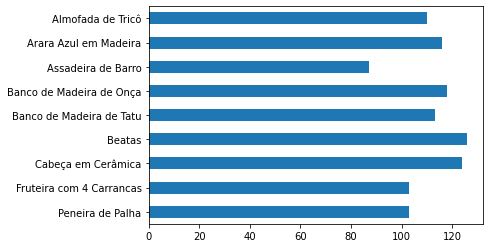

In [80]:
data.Produto.value_counts().sort_index(ascending=False).plot(kind='barh')

<BarContainer object of 2 artists>

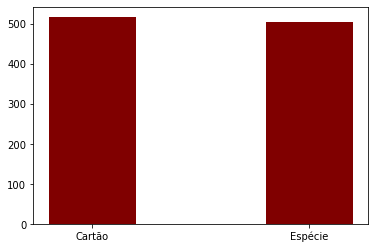

In [95]:
y = [] 
y.append(int(data['Cartão'].value_counts()))
y.append(int(data['Espécie'].value_counts()))
x = ['Cartão','Espécie']
plt.bar(x, y, color ='maroon',
        width = 0.4)
